# Training a model with a curated image datasets in fastai
Walkthrough of how to train a deep learning model in fastai with a curated image dataset


In [15]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

In [16]:
# set up the notebook for fast.ai
fastbook.setup_book()

# Ingest the dataset
- create a path object
- defined an ImageDataLoaders object

In [17]:
# ingest the curated image dataset FLOWERS
path = untar_data(URLs.CIFAR)

In [18]:
# examine the directory structure of the dataset
path.ls()

(#3) [Path('/storage/data/cifar10/test'),Path('/storage/data/cifar10/train'),Path('/storage/data/cifar10/labels.txt')]

In [19]:
dls = ImageDataLoaders.from_folder(path, train='train', valid='test')

# Examine the dataset

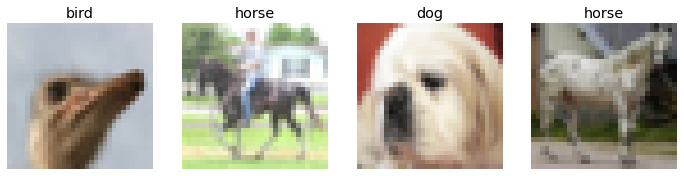

In [20]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


In [21]:
# examine the train subdirectory
(path/'train').ls()

(#10) [Path('/storage/data/cifar10/train/dog'),Path('/storage/data/cifar10/train/automobile'),Path('/storage/data/cifar10/train/frog'),Path('/storage/data/cifar10/train/airplane'),Path('/storage/data/cifar10/train/deer'),Path('/storage/data/cifar10/train/horse'),Path('/storage/data/cifar10/train/cat'),Path('/storage/data/cifar10/train/truck'),Path('/storage/data/cifar10/train/bird'),Path('/storage/data/cifar10/train/ship')]

In [22]:
(path/'train/dog').ls()

(#5000) [Path('/storage/data/cifar10/train/dog/15233_dog.png'),Path('/storage/data/cifar10/train/dog/1519_dog.png'),Path('/storage/data/cifar10/train/dog/13990_dog.png'),Path('/storage/data/cifar10/train/dog/16280_dog.png'),Path('/storage/data/cifar10/train/dog/42635_dog.png'),Path('/storage/data/cifar10/train/dog/37152_dog.png'),Path('/storage/data/cifar10/train/dog/16540_dog.png'),Path('/storage/data/cifar10/train/dog/2182_dog.png'),Path('/storage/data/cifar10/train/dog/48048_dog.png'),Path('/storage/data/cifar10/train/dog/17186_dog.png')...]

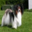

In [23]:
# take a look at one of the images
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

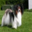

In [24]:
# display a thumbnail of the image
img.to_thumb(180)

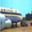

In [25]:
img = PILImage.create(img_files[3000])
img

# Define and train the model

In [26]:
#learn = cnn_learner(dls, resnet18, pretrained=False,
#                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn = cnn_learner(dls, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [27]:
%%time
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.834696,1.698438,0.467800,00:56


epoch,train_loss,valid_loss,accuracy,time
0,1.312279,1.225815,0.677300,01:05
1,1.111695,1.048064,0.760600,01:06
2,0.947037,0.991742,0.785300,01:05
3,0.810161,0.987946,0.791500,01:05
4,0.745295,0.995719,0.793400,01:05


CPU times: user 6min 8s, sys: 9.33 s, total: 6min 18s
Wall time: 6min 25s


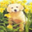

In [28]:
# take a look at one of the test images
img_test_files = get_image_files(path/"test")
img2 = PILImage.create(img_test_files[700])
img2

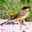

In [29]:
# select an image from the test set
img3 = PILImage.create(img_test_files[8000])
img3

In [30]:
# apply the trained model to the image
learn.predict(img2)

('dog',
 TensorImage(5),
 TensorImage([0.0167, 0.0154, 0.1496, 0.0879, 0.0338, 0.4890, 0.1772, 0.0096, 0.0082, 0.0125]))

In [32]:
# apply the trained model to the image
learn.predict(img3)

('bird',
 TensorImage(2),
 TensorImage([0.0153, 0.0173, 0.7091, 0.0153, 0.1924, 0.0120, 0.0116, 0.0098, 0.0067, 0.0105]))

In [34]:
learn.path = Path('/notebooks/temp')
learn.export('cifar_apr20_2021.pkl')